In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
def recalibrate_region(UTR_region, InteractionRegionUTR):
    x = UTR_region.split(':')[1]
    start_utr, end_utr = x.split('-')
    
    start_interaction, end_interaction = InteractionRegionUTR.split(',')
    return str(int(start_utr) + int(start_interaction)) + ','+ str(int(start_utr) + int(end_interaction))

def eval_miRNA(miRNA):
    if miRNA in list(ug1):
        return 'ug1'
    elif miRNA in list(ug2):
        return 'ug2'
    elif miRNA in list(ug3):
        return 'ug3'
    elif miRNA in list(ug4):
        return 'ug4'
    elif miRNA in list(ugG):
        return 'ugG'
    else:
        return 'NaN'
def eval_miRNA2(miRNA):
    if miRNA in list(ug1):
        return 'ug1'
    elif miRNA in list(ug2):
        return 'ug2'
    elif miRNA in list(ugG):
        return 'ugG'
    else:
        return 'NaN'

# Real

In [3]:
dfsp = pd.read_csv('../../Data/Estratos/Pathways_ExpressionFilter/Expanded_miRNAPredicted_spectrum_Filter_KEGG.tsv', sep = '\t')
#dfsp = dfsp[dfsp['p_value'] <= 0.001]
dfsp = dfsp[~dfsp['function'].str.contains('cancer', case=False, na=False)]
dfsp = dfsp[dfsp['function'].str.contains('pathway', case=False, na=False)]
dfsp

,function,p_value,miRNA,Variant,DuplexEnergy,Jaccard,Region,UTR_region,InteractionRegionUTR
2,ErbB signaling pathway,0.012417,hsa-miR-193a-5p,Gs4,-19.4,0.809524,5'UTR,>Gs4:45-209,"50,70"
4,HIF-1 signaling pathway,0.012417,hsa-miR-193a-5p,Gs4,-19.4,0.809524,5'UTR,>Gs4:45-209,"50,70"
5,Insulin signaling pathway,0.035087,hsa-miR-193a-5p,Gs4,-19.4,0.809524,5'UTR,>Gs4:45-209,"50,70"
8,Neurotrophin signaling pathway,0.039387,hsa-miR-193a-5p,Gs4,-19.4,0.809524,5'UTR,>Gs4:45-209,"50,70"
13,Thyroid hormone signaling pathway,0.035087,hsa-miR-193a-5p,Gs4,-19.4,0.809524,5'UTR,>Gs4:45-209,"50,70"
...,...,...,...,...,...,...,...,...,...
4780,Thyroid hormone signaling pathway,0.005220,hsa-miR-29b-3p,Gs4,-10.0,0.800000,3'UTR,>Gs4:29824-29823,"33,52"
4784,VEGF signaling pathway,0.003531,hsa-miR-29b-3p,Gs4,-10.0,0.800000,3'UTR,>Gs4:29824-29823,"33,52"
4785,mTOR signaling pathway,0.005432,hsa-miR-29b-3p,Gs4,-10.0,0.800000,3'UTR,>Gs4:29824-29823,"33,52"
4789,Rap1 signaling pathway,0.042098,hsa-miR-140-5p,Gs1,-10.0,0.800000,3'UTR,>Gs1:29707-29733,"7,16"


In [4]:

dfsp['InteractionRegionUTR'] = list(map(recalibrate_region, dfsp['UTR_region'], dfsp['InteractionRegionUTR']))
dfsp

,function,p_value,miRNA,Variant,DuplexEnergy,Jaccard,Region,UTR_region,InteractionRegionUTR
2,ErbB signaling pathway,0.012417,hsa-miR-193a-5p,Gs4,-19.4,0.809524,5'UTR,>Gs4:45-209,"95,115"
4,HIF-1 signaling pathway,0.012417,hsa-miR-193a-5p,Gs4,-19.4,0.809524,5'UTR,>Gs4:45-209,"95,115"
5,Insulin signaling pathway,0.035087,hsa-miR-193a-5p,Gs4,-19.4,0.809524,5'UTR,>Gs4:45-209,"95,115"
8,Neurotrophin signaling pathway,0.039387,hsa-miR-193a-5p,Gs4,-19.4,0.809524,5'UTR,>Gs4:45-209,"95,115"
13,Thyroid hormone signaling pathway,0.035087,hsa-miR-193a-5p,Gs4,-19.4,0.809524,5'UTR,>Gs4:45-209,"95,115"
...,...,...,...,...,...,...,...,...,...
4780,Thyroid hormone signaling pathway,0.005220,hsa-miR-29b-3p,Gs4,-10.0,0.800000,3'UTR,>Gs4:29824-29823,"29857,29876"
4784,VEGF signaling pathway,0.003531,hsa-miR-29b-3p,Gs4,-10.0,0.800000,3'UTR,>Gs4:29824-29823,"29857,29876"
4785,mTOR signaling pathway,0.005432,hsa-miR-29b-3p,Gs4,-10.0,0.800000,3'UTR,>Gs4:29824-29823,"29857,29876"
4789,Rap1 signaling pathway,0.042098,hsa-miR-140-5p,Gs1,-10.0,0.800000,3'UTR,>Gs1:29707-29733,"29714,29723"


In [5]:
dfsp = dfsp[dfsp['Region']=="5'UTR"]
dfsp = dfsp[['miRNA', 'Variant', 'InteractionRegionUTR']]

In [6]:
g1 = list(dfsp[dfsp['Variant']=='Gs1']['miRNA'])
g2 = list(dfsp[dfsp['Variant']=='Gs2']['miRNA'])
g3 = list(dfsp[dfsp['Variant']=='Gs3']['miRNA'])
g4 = list(dfsp[dfsp['Variant']=='Gs4']['miRNA'])

ug1 = set(g1) - (set(g2) | set(g3) | set(g4))
ug2 = set(g2) - (set(g1) | set(g3) | set(g4))
ug3 = set(g3) - (set(g1) | set(g2) | set(g4))
ug4 = set(g4) - (set(g1) | set(g2) | set(g3))
ugG = set(g4) & set(g1) & set(g2) & set(g3)

print(f'{len(ug1)}, {len(ug2)},{len(ug3)},{len(ug4)}, {len(ugG)}')

2, 0,2,1, 30


In [7]:
list(ug1)

['hsa-miR-206', 'hsa-miR-7-1-3p']

In [8]:
dfsp['group'] = dfsp['miRNA'].apply(eval_miRNA)
dfsp = dfsp[dfsp['group']!= 'NaN']
dfsp.head()

,miRNA,Variant,InteractionRegionUTR,group
2,hsa-miR-193a-5p,Gs4,"95,115",ugG
4,hsa-miR-193a-5p,Gs4,"95,115",ugG
5,hsa-miR-193a-5p,Gs4,"95,115",ugG
8,hsa-miR-193a-5p,Gs4,"95,115",ugG
13,hsa-miR-193a-5p,Gs4,"95,115",ugG


In [9]:
dfsp.drop(['Variant'], axis = 1, inplace = True)
dfsp = dfsp.drop_duplicates()
dfsp.columns = ['miRNA', 'region_pair', 'group']
dfsp.head()

,miRNA,region_pair,group
2,hsa-miR-193a-5p,"95,115",ugG
65,hsa-let-7b-5p,"101,124",ugG
234,hsa-miR-486-3p,"84,103",ugG
256,hsa-miR-34c-5p,"91,114",ugG
344,hsa-miR-33a-5p,"102,121",ugG


In [10]:
df2 = dfsp
df2['rep'] = df2.groupby('miRNA').cumcount() + 1
df2.head()

,miRNA,region_pair,group,rep
2,hsa-miR-193a-5p,"95,115",ugG,1
65,hsa-let-7b-5p,"101,124",ugG,1
234,hsa-miR-486-3p,"84,103",ugG,1
256,hsa-miR-34c-5p,"91,114",ugG,1
344,hsa-miR-33a-5p,"102,121",ugG,1


In [11]:
lst = []
for i,k in zip(df2.region_pair, df2.miRNA):
    start, end = i.split(',')
    x = list(range(int(start), int(end) + 1))
    
    for j,l in zip(df2.region_pair, df2.miRNA):
        if i != j:            
            start2, end2 = j.split(',')
            y = list(range(int(start2), int(end2) + 1))
            d = set(x) & set(y)
            if len(d) > 0:
                lst.append([k,l])

# Crear un DataFrame
dfn = pd.DataFrame(lst, columns=['miRNA1', 'miRNA2'])

# Crear un grafo
G = nx.Graph()
G.add_edges_from(dfn.values)

# Encontrar componentes conectados
connected_components = list(nx.connected_components(G))

# Convertir a lista de listas
result = [list(component) for component in connected_components]
result

[['hsa-miR-200c-3p',
  'hsa-miR-95-3p',
  'hsa-miR-25-3p',
  'hsa-miR-21-3p',
  'hsa-miR-101-5p',
  'hsa-miR-18b-5p',
  'hsa-miR-92b-3p',
  'hsa-miR-18a-5p',
  'hsa-miR-501-5p',
  'hsa-let-7b-5p',
  'hsa-miR-503-5p',
  'hsa-miR-193a-5p',
  'hsa-miR-154-5p',
  'hsa-miR-223-3p',
  'hsa-miR-324-5p',
  'hsa-miR-324-3p',
  'hsa-miR-199a-3p',
  'hsa-miR-34c-5p',
  'hsa-miR-497-5p',
  'hsa-miR-7-1-3p',
  'hsa-miR-340-5p',
  'hsa-miR-342-3p',
  'hsa-miR-369-5p',
  'hsa-miR-486-3p',
  'hsa-miR-186-5p',
  'hsa-miR-182-5p',
  'hsa-miR-29a-5p',
  'hsa-miR-15b-5p',
  'hsa-miR-23b-3p',
  'hsa-miR-124-3p',
  'hsa-miR-378a-3p',
  'hsa-miR-148b-3p',
  'hsa-miR-33a-5p']]

In [12]:
miRNA_dict_list = [{miRNA: idx + 1 for idx, miRNA in enumerate(sublist)} for sublist in result]
miRNA_dict_list

[{'hsa-miR-200c-3p': 1,
  'hsa-miR-95-3p': 2,
  'hsa-miR-25-3p': 3,
  'hsa-miR-21-3p': 4,
  'hsa-miR-101-5p': 5,
  'hsa-miR-18b-5p': 6,
  'hsa-miR-92b-3p': 7,
  'hsa-miR-18a-5p': 8,
  'hsa-miR-501-5p': 9,
  'hsa-let-7b-5p': 10,
  'hsa-miR-503-5p': 11,
  'hsa-miR-193a-5p': 12,
  'hsa-miR-154-5p': 13,
  'hsa-miR-223-3p': 14,
  'hsa-miR-324-5p': 15,
  'hsa-miR-324-3p': 16,
  'hsa-miR-199a-3p': 17,
  'hsa-miR-34c-5p': 18,
  'hsa-miR-497-5p': 19,
  'hsa-miR-7-1-3p': 20,
  'hsa-miR-340-5p': 21,
  'hsa-miR-342-3p': 22,
  'hsa-miR-369-5p': 23,
  'hsa-miR-486-3p': 24,
  'hsa-miR-186-5p': 25,
  'hsa-miR-182-5p': 26,
  'hsa-miR-29a-5p': 27,
  'hsa-miR-15b-5p': 28,
  'hsa-miR-23b-3p': 29,
  'hsa-miR-124-3p': 30,
  'hsa-miR-378a-3p': 31,
  'hsa-miR-148b-3p': 32,
  'hsa-miR-33a-5p': 33}]

In [13]:
# Crear un diccionario vacío
diccionario_combinado = {}

# Iterar sobre cada diccionario en la lista
for dic in miRNA_dict_list:
    diccionario_combinado.update(dic)

df2['mapped_value'] = df2['miRNA'].map(diccionario_combinado).fillna(1).astype(int)
df2.head()

,miRNA,region_pair,group,rep,mapped_value
2,hsa-miR-193a-5p,"95,115",ugG,1,12
65,hsa-let-7b-5p,"101,124",ugG,1,10
234,hsa-miR-486-3p,"84,103",ugG,1,24
256,hsa-miR-34c-5p,"91,114",ugG,1,18
344,hsa-miR-33a-5p,"102,121",ugG,1,33


In [14]:
# Crear un nuevo DataFrame para almacenar los resultados
df_result = pd.DataFrame(columns=['miRNA', 'region_pair', 'group', 'rep', 'position', 'value'])

# Separar 'region_pair' en 'start' y 'end' y añadir a df_result
for index, row in df2.iterrows():
    start, end = row['region_pair'].split(',')
    df_result = df_result._append({
        'miRNA': row['miRNA'],
        'region_pair': row['region_pair'],
        'group': row['group'],
        'rep': row['rep'],
        'position': 'start',
        'value': start,
         'mapped_value': row['mapped_value']
    }, ignore_index=True)
    df_result = df_result._append({
        'miRNA': row['miRNA'],
        'region_pair': row['region_pair'],
        'group': row['group'],
        'rep': row['rep'],
        'position': 'end',
        'value': end, 
        'mapped_value': row['mapped_value']
    }, ignore_index=True)

df_result

,miRNA,region_pair,group,rep,position,value,mapped_value
0,hsa-miR-193a-5p,"95,115",ugG,1,start,95,12.0
1,hsa-miR-193a-5p,"95,115",ugG,1,end,115,12.0
2,hsa-let-7b-5p,"101,124",ugG,1,start,101,10.0
3,hsa-let-7b-5p,"101,124",ugG,1,end,124,10.0
4,hsa-miR-486-3p,"84,103",ugG,1,start,84,24.0
...,...,...,...,...,...,...,...
91,hsa-miR-378a-3p,"257,263",ugG,1,end,263,31.0
92,hsa-miR-340-5p,"197,207",ugG,2,start,197,21.0
93,hsa-miR-340-5p,"197,207",ugG,2,end,207,21.0
94,hsa-miR-497-5p,"258,268",ugG,2,start,258,19.0


In [15]:
df_result['value'] = list(map(float, df_result['value'] ))
df_result1 = df_result

# 3 UTR

In [16]:
dfsp = pd.read_csv('../../Data/Estratos/Pathways_ExpressionFilter/Expanded_miRNAPredicted_spectrum_Filter_KEGG.tsv', sep = '\t')
#dfsp = dfsp[dfsp['p_value'] <= 0.001]
dfsp = dfsp[~dfsp['function'].str.contains('cancer', case=False, na=False)]
dfsp = dfsp[dfsp['function'].str.contains('pathway', case=False, na=False)]

dfsp['InteractionRegionUTR'] = list(map(recalibrate_region, dfsp['UTR_region'], dfsp['InteractionRegionUTR']))

dfsp = dfsp[dfsp['Region']=="3'UTR"]
dfsp = dfsp[['miRNA', 'Variant', 'InteractionRegionUTR']]


g1 = list(dfsp[dfsp['Variant']=='Gs1']['miRNA'])
g2 = list(dfsp[dfsp['Variant']=='Gs2']['miRNA'])
g3 = list(dfsp[dfsp['Variant']=='Gs3']['miRNA'])
g4 = list(dfsp[dfsp['Variant']=='Gs4']['miRNA'])

ug1 = set(g1) - (set(g2) | set(g3) | set(g4))
ug2 = set(g2) - (set(g1) | set(g3) | set(g4))
ug3 = set(g3) - (set(g1) | set(g2) | set(g4))
ug4 = set(g4) - (set(g1) | set(g2) | set(g3))
ugG = set(g4) & set(g1) & set(g2) & set(g3)

print(f'{len(ug1)}, {len(ug2)},{len(ug3)},{len(ug4)}, {len(ugG)}')

dfsp['group'] = dfsp['miRNA'].apply(eval_miRNA)
dfsp = dfsp[dfsp['group']!= 'NaN']

dfsp.drop(['Variant'], axis = 1, inplace = True)
dfsp = dfsp.drop_duplicates()
dfsp.columns = ['miRNA', 'region_pair', 'group']

df2 = dfsp
df2['rep'] = df2.groupby('miRNA').cumcount() + 1

lst = []
for i,k in zip(df2.region_pair, df2.miRNA):
    start, end = i.split(',')
    x = list(range(int(start), int(end) + 1))
    
    for j,l in zip(df2.region_pair, df2.miRNA):
        if i != j:            
            start2, end2 = j.split(',')
            y = list(range(int(start2), int(end2) + 1))
            d = set(x) & set(y)
            if len(d) > 0:
                lst.append([k,l])

# Crear un DataFrame
dfn = pd.DataFrame(lst, columns=['miRNA1', 'miRNA2'])

# Crear un grafo
G = nx.Graph()
G.add_edges_from(dfn.values)

# Encontrar componentes conectados
connected_components = list(nx.connected_components(G))

# Convertir a lista de listas
result = [list(component) for component in connected_components]

miRNA_dict_list = [{miRNA: idx + 1 for idx, miRNA in enumerate(sublist)} for sublist in result]

# Crear un diccionario vacío
diccionario_combinado = {}

# Iterar sobre cada diccionario en la lista
for dic in miRNA_dict_list:
    diccionario_combinado.update(dic)

df2['mapped_value'] = df2['miRNA'].map(diccionario_combinado).fillna(1).astype(int)

df_result = pd.DataFrame(columns=['miRNA', 'region_pair', 'group', 'rep', 'position', 'value'])

# Separar 'region_pair' en 'start' y 'end' y añadir a df_result
for index, row in df2.iterrows():
    start, end = row['region_pair'].split(',')
    df_result = df_result._append({
        'miRNA': row['miRNA'],
        'region_pair': row['region_pair'],
        'group': row['group'],
        'rep': row['rep'],
        'position': 'start',
        'value': start,
         'mapped_value': row['mapped_value']
    }, ignore_index=True)
    df_result = df_result._append({
        'miRNA': row['miRNA'],
        'region_pair': row['region_pair'],
        'group': row['group'],
        'rep': row['rep'],
        'position': 'end',
        'value': end, 
        'mapped_value': row['mapped_value']
    }, ignore_index=True)

df_result['value'] = list(map(float, df_result['value'] ))
df_result2 = df_result
df_result

5, 0,4,0, 6


,miRNA,region_pair,group,rep,position,value,mapped_value
0,hsa-miR-199a-3p,"29703,29719",ugG,1,start,29703.0,5.0
1,hsa-miR-199a-3p,"29703,29719",ugG,1,end,29719.0,5.0
2,hsa-miR-449b-5p,"29762,29776",ug1,1,start,29762.0,3.0
3,hsa-miR-449b-5p,"29762,29776",ug1,1,end,29776.0,3.0
4,hsa-miR-324-5p,"29839,29851",ugG,1,start,29839.0,11.0
...,...,...,...,...,...,...,...
67,hsa-miR-135a-5p,"29827,29836",ugG,7,end,29836.0,7.0
68,hsa-miR-23b-3p,"29836,29847",ugG,2,start,29836.0,9.0
69,hsa-miR-23b-3p,"29836,29847",ugG,2,end,29847.0,9.0
70,hsa-miR-92b-3p,"29756,29763",ug1,1,start,29756.0,1.0


# ajuste custom

In [17]:
df_result2[df_result2['miRNA']=='hsa-miR-103a-3p']

,miRNA,region_pair,group,rep,position,value,mapped_value
12,hsa-miR-103a-3p,"29843,29857",ugG,1,start,29843.0,8.0
13,hsa-miR-103a-3p,"29843,29857",ugG,1,end,29857.0,8.0
14,hsa-miR-103a-3p,"29841,29855",ugG,2,start,29841.0,8.0
15,hsa-miR-103a-3p,"29841,29855",ugG,2,end,29855.0,8.0
16,hsa-miR-103a-3p,"29831,29845",ugG,3,start,29831.0,8.0
17,hsa-miR-103a-3p,"29831,29845",ugG,3,end,29845.0,8.0
18,hsa-miR-103a-3p,"29838,29852",ugG,4,start,29838.0,8.0
19,hsa-miR-103a-3p,"29838,29852",ugG,4,end,29852.0,8.0


In [18]:
df_result1.drop([38, 39, 18, 19, 56, 57], inplace = True)

df_result2.drop([14,15,16,17,18,19, 26,27,28,29,30,31,32,33, 
                 50, 51, 52, 53, 56, 57, 36,37, 38, 39, 40, 41, 54, 55, 
                 60, 61, 66, 67, 6,7,8,9,10,11,42,43], inplace = True)

In [19]:
df_result1.to_csv('../../Data/miRNA_predicted_ToPlot_spectrum_5UTR.tsv', index = False, sep = '\t')
df_result2.to_csv('../../Data/miRNA_predicted_ToPlot_spectrum_3UTR.tsv', index = False, sep = '\t')

In [20]:
df_result1.loc[df_result1['group'] != 'ugG', 'mapped_value'] = df_result1.loc[df_result1['group'] != 'ugG', 'mapped_value'].apply(lambda x: x + 35)
df_result2.loc[df_result2['group'] != 'ugG', 'mapped_value'] = df_result2.loc[df_result2['group'] != 'ugG', 'mapped_value'].apply(lambda x: x + 15)

df_result1.loc[df_result1['miRNA'] == 'hsa-miR-7-1-3p', 'mapped_value'] = df_result1.loc[df_result1['miRNA'] == 'hsa-miR-7-1-3p', 'mapped_value'].apply(lambda x: x - 10)
df_result1.loc[df_result1['miRNA'] == 'hsa-miR-124-3p', 'mapped_value'] = df_result1.loc[df_result1['miRNA'] == 'hsa-miR-124-3p', 'mapped_value'].apply(lambda x: x - 28)
df_result1.loc[df_result1['miRNA'] == 'hsa-miR-503-5p', 'mapped_value'] = df_result1.loc[df_result1['miRNA'] == 'hsa-miR-503-5p', 'mapped_value'].apply(lambda x: x - 3)
df_result1.loc[df_result1['miRNA'] == 'hsa-miR-369-5p', 'mapped_value'] = df_result1.loc[df_result1['miRNA'] == 'hsa-miR-369-5p', 'mapped_value'].apply(lambda x: x - 24)
df_result1.loc[df_result1['miRNA'] == 'hsa-miR-18b-5p', 'mapped_value'] = df_result1.loc[df_result1['miRNA'] == 'hsa-miR-18b-5p', 'mapped_value'].apply(lambda x: x - 1)
df_result1.loc[df_result1['miRNA'] == 'hsa-miR-342-3p', 'mapped_value'] = df_result1.loc[df_result1['miRNA'] == 'hsa-miR-342-3p', 'mapped_value'].apply(lambda x: x - 4)
df_result1.loc[df_result1['miRNA'] == 'hsa-miR-378a-3p', 'mapped_value'] = df_result1.loc[df_result1['miRNA'] == 'hsa-miR-378a-3p', 'mapped_value'].apply(lambda x: x - 4)
df_result1.loc[df_result1['miRNA'] == 'hsa-miR-15b-5p', 'mapped_value'] = df_result1.loc[df_result1['miRNA'] == 'hsa-miR-15b-5p', 'mapped_value'].apply(lambda x: x - 15)
df_result1.loc[df_result1['miRNA'] == 'hsa-miR-18b-5p', 'mapped_value'] = df_result1.loc[df_result1['miRNA'] == 'hsa-miR-18b-5p', 'mapped_value'].apply(lambda x: x - 1)
df_result1.loc[df_result1['miRNA'] == 'hsa-miR-193a-5p', 'mapped_value'] = df_result1.loc[df_result1['miRNA'] == 'hsa-miR-193a-5p', 'mapped_value'].apply(lambda x: x - 4)
df_result1.loc[df_result1['miRNA'] == 'hsa-miR-324-3p', 'mapped_value'] = df_result1.loc[df_result1['miRNA'] == 'hsa-miR-324-3p', 'mapped_value'].apply(lambda x: x + 4)
df_result2.loc[df_result2['miRNA'] == 'hsa-miR-135a-5p', 'mapped_value'] = df_result2.loc[df_result2['miRNA'] == 'hsa-miR-135a-5p', 'mapped_value'].apply(lambda x: x - 1)


df_result1.loc[34:35, 'mapped_value'] -= 2


df_result1


,miRNA,region_pair,group,rep,position,value,mapped_value
0,hsa-miR-193a-5p,"95,115",ugG,1,start,95.0,8.0
1,hsa-miR-193a-5p,"95,115",ugG,1,end,115.0,8.0
2,hsa-let-7b-5p,"101,124",ugG,1,start,101.0,10.0
3,hsa-let-7b-5p,"101,124",ugG,1,end,124.0,10.0
4,hsa-miR-486-3p,"84,103",ugG,1,start,84.0,24.0
...,...,...,...,...,...,...,...
91,hsa-miR-378a-3p,"257,263",ugG,1,end,263.0,27.0
92,hsa-miR-340-5p,"197,207",ugG,2,start,197.0,21.0
93,hsa-miR-340-5p,"197,207",ugG,2,end,207.0,21.0
94,hsa-miR-497-5p,"258,268",ugG,2,start,258.0,19.0


# Merge

In [21]:
df_result1['group'] = pd.Categorical(df_result1['group'], categories=['ug1', 'ug2', 'ug3', 'ug4', 'ugG'], ordered=True)
df_result2['group'] = pd.Categorical(df_result2['group'], categories=['ug1', 'ug2', 'ug3', 'ug4', 'ugG'], ordered=True)

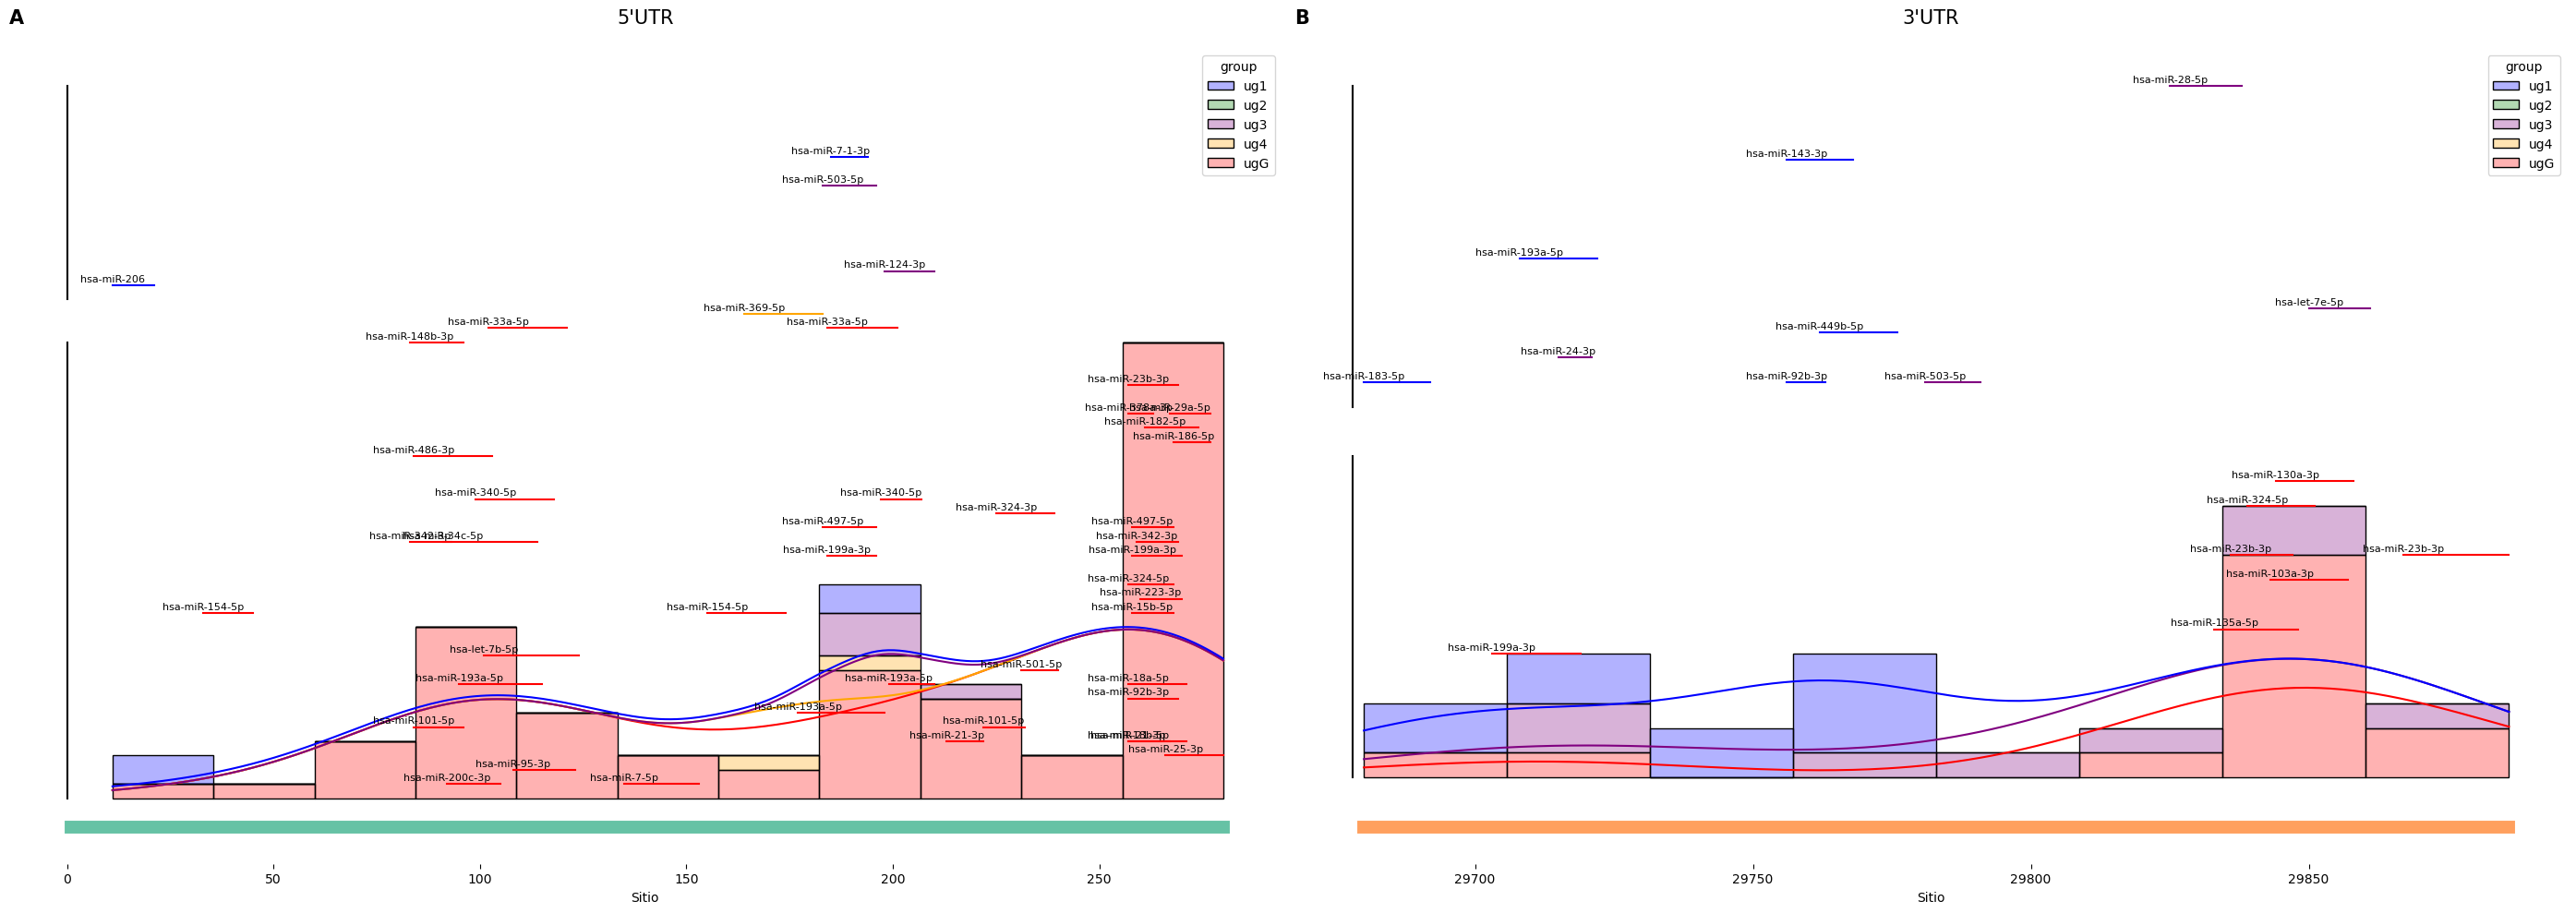

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(28, 10))

# Primer gráfico
for i in df_result1.miRNA.unique():
    df_i = df_result1[df_result1['miRNA'] == i]
    for j in df_i.rep.unique():
        df_ij = df_i[df_i['rep'] == j]
        sns.lineplot(data=df_ij, x='value', y='mapped_value', hue='group', 
                     palette={'ugG': 'red', 'ug1': 'blue', 'ug2': 'green', 'ug3': 'purple', 'ug4': 'orange'}, 
                     legend=False, ax=ax1)

# Agrupar por miRNA y anotar solo el primer punto de cada grupo
grouped = df_result1.groupby(by=['miRNA', 'rep']).first().reset_index()
for i in range(len(grouped)):
    ax1.annotate(grouped['miRNA'][i], (grouped['value'][i], grouped['mapped_value'][i]), textcoords="offset points", 
                 xytext=(0, 3), ha='center', fontsize=8)


df_line = pd.DataFrame({
    'value':[1, 280],
    'mapped_value': [-2,-2],
    'group': ['5', '5']
})
sns.lineplot(data=df_line, x='value', y='mapped_value', hue='group', 
                     palette='Set2', linewidth = 10, 
                     legend=False, ax=ax1)


sns.histplot(data=df_result1, x="value", kde=True, hue = 'group', ax = ax1,  multiple="stack", binwidth= 25,
             palette={'ugG': 'red', 'ug1': 'blue', 'ug2': 'green', 'ug3': 'purple', 'ug4': 'orange'}, alpha = 0.3)

# Añadir una línea vertical 
ax1.plot([0, 0], [0, 32], color='black', linestyle='-')
ax1.plot([0, 0], [35, 50], color='black', linestyle='-')


sns.despine(left=True, bottom=True, ax=ax1)


# Segundo gráfico
for i in df_result2.miRNA.unique():
    df_i = df_result2[df_result2['miRNA'] == i]
    for j in df_i.rep.unique():
        df_ij = df_i[df_i['rep'] == j]
        sns.lineplot(data=df_ij, x='value', y='mapped_value', hue='group', 
                     palette={'ugG': 'red', 'ug1': 'blue', 'ug2': 'green', 'ug3': 'purple', 'ug4': 'orange'}, 
                     legend=False, ax=ax2)

# Agrupar por miRNA y anotar solo el primer punto de cada grupo
grouped = df_result2.groupby(by=['miRNA', 'rep']).first().reset_index()
for i in range(len(grouped)):
    ax2.annotate(grouped['miRNA'][i], (grouped['value'][i], grouped['mapped_value'][i]), textcoords="offset points", 
                 xytext=(0, 3), ha='center', fontsize=8)

df_line = pd.DataFrame({
    'value':[29680, 29886],
    'mapped_value': [-2, -2],
    'group': ['3', '3']
})
sns.lineplot(data=df_line, x='value', y='mapped_value', hue='group', 
                     palette={'3': '#ffa05e'}, linewidth = 10, 
                     legend=False, ax=ax2)

sns.histplot(data=df_result2, x="value", kde=True, hue = 'group', ax = ax2,  multiple="stack", binwidth= 25,
             palette={'ugG': 'red', 'ug1': 'blue', 'ug2': 'green', 'ug3': 'purple', 'ug4': 'orange'}, alpha = 0.3)


sns.despine(left=True, bottom=True, ax=ax2)


# Añadir una línea vertical 
ax2.plot([29678, 29678], [0, 13], color='black', linestyle='-')
ax2.plot([29678, 29678], [15, 28], color='black', linestyle='-')



ax1.set_title('A', fontweight="bold", loc = 'left', fontsize=15)
ax1.set_title("5'UTR", fontsize=15, pad=20)


ax2.set_title('B', fontweight="bold", loc = 'left', fontsize=15)
ax2.set_title("3'UTR", fontsize=15, pad=20)

ax1.set_xlabel('Sitio')
ax2.set_xlabel('Sitio')

ax1.set_ylabel('')
ax2.set_ylabel('')

ax1.set_yticks([])
ax2.set_yticks([])

plt.tight_layout()
plt.savefig('../../Plots/miRNA_predicted_geoCluster.pdf')
plt.show()

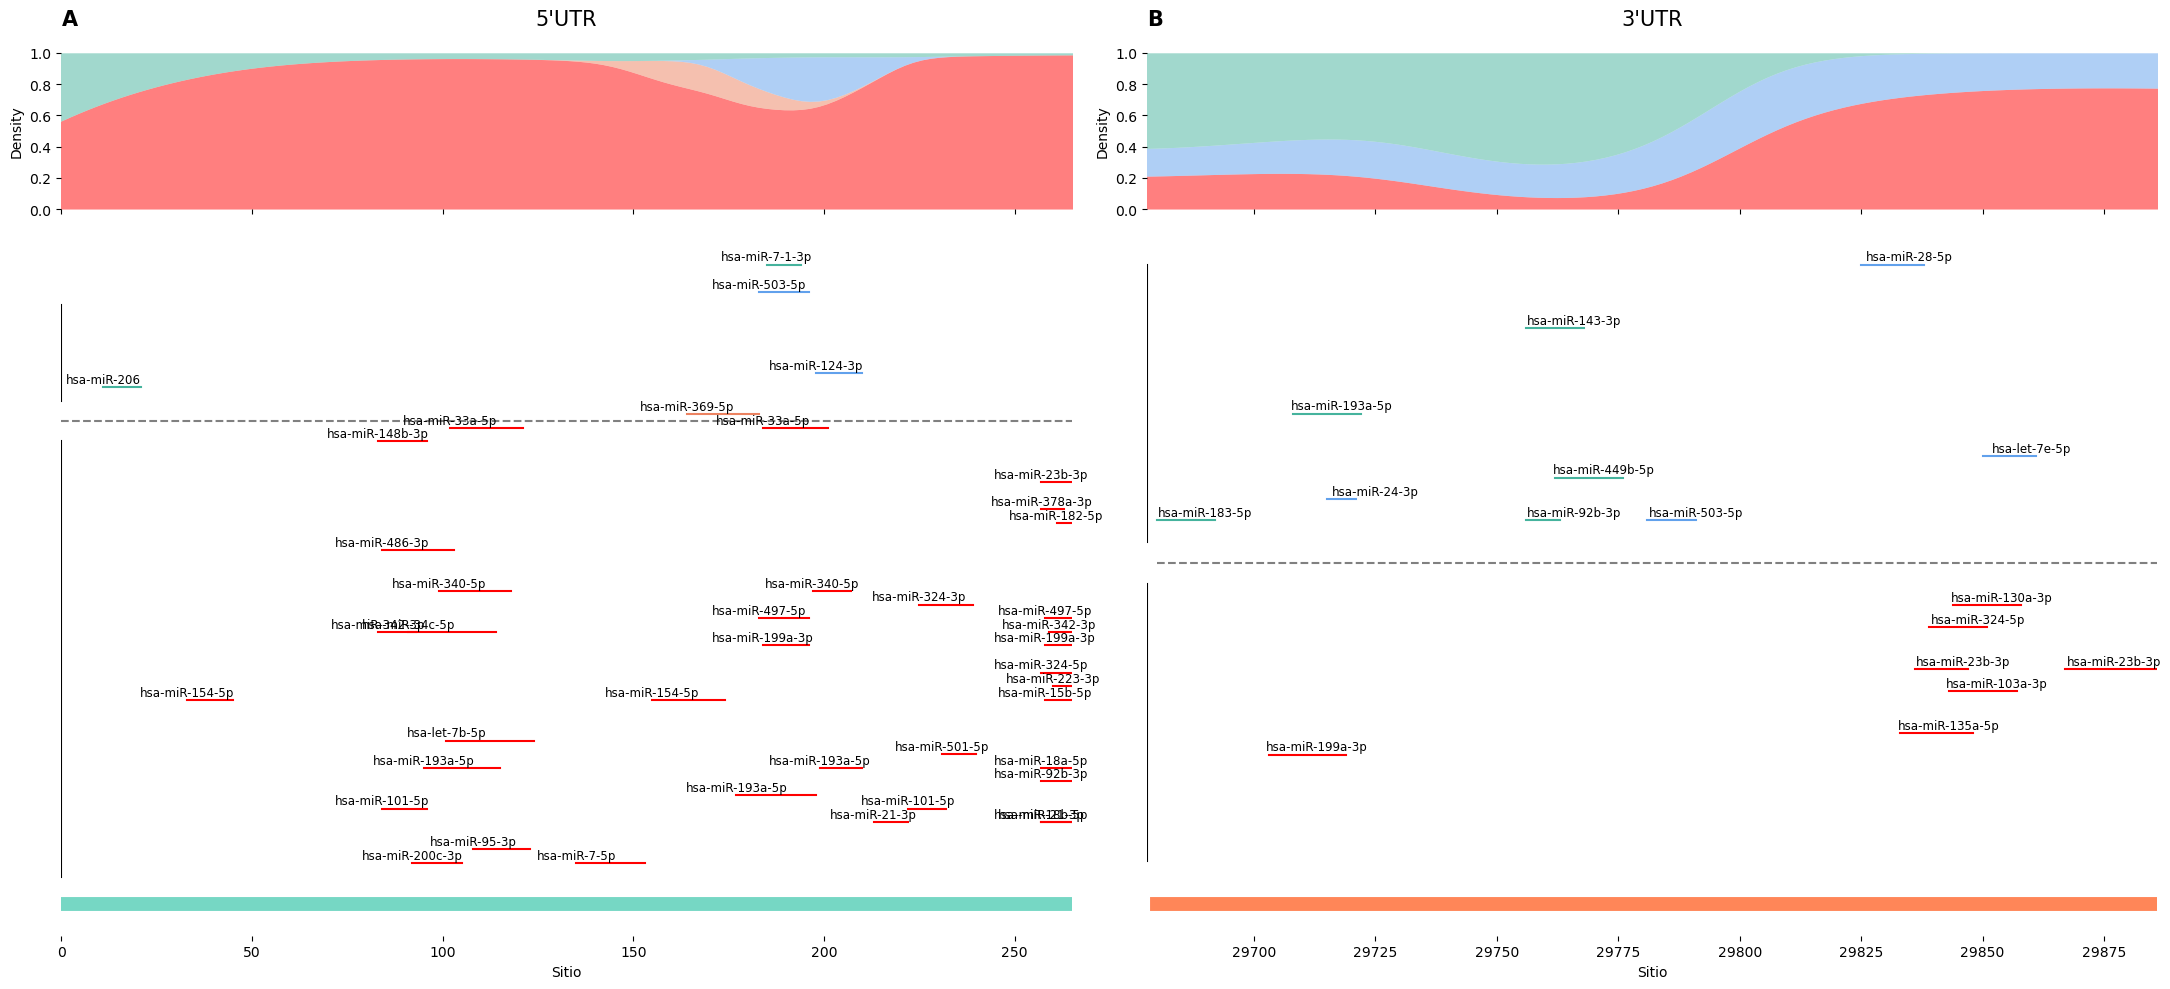

In [23]:
p = {'ugG': 'red', 'ug1': '#45B39D', 'ug2': '#F7DC6F', 'ug3': '#61A1EC', 'ug4': '#EC8361'}

fig, axs = plt.subplots(2, 2, sharex='col', figsize=(22, 10) , gridspec_kw={'height_ratios': [2, 9]})

#===================================== five plot on the top =============================


sns.kdeplot(data=df_result1, x="value", hue='group', ax=axs[0, 0], palette=p, legend=False, 
            alpha=0.5, multiple="fill", linewidth=0)

axs[0,0].set_xlim([0, 265]) 


sns.kdeplot(data=df_result2, x="value", hue='group', ax=axs[0, 1], palette=p, legend=False, 
            alpha=0.5, multiple="fill", linewidth=0)

axs[0,1].set_xlim([29678, 29886]) 



# Primer gráfico
for i in df_result1.miRNA.unique():
    df_i = df_result1[df_result1['miRNA'] == i]
    for j in df_i.rep.unique():
        df_ij = df_i[df_i['rep'] == j]
        sns.lineplot(data=df_ij, x='value', y='mapped_value', hue='group', 
                     palette=p, 
                     legend=False, ax=axs[1,0])

# Agrupar por miRNA y anotar solo el primer punto de cada grupo
grouped = df_result1.groupby(by=['miRNA', 'rep']).first().reset_index()
for i in range(len(grouped)):
    axs[1,0].annotate(grouped['miRNA'][i], (grouped['value'][i], grouped['mapped_value'][i]), textcoords="offset points", 
                 xytext=(0, 3), ha='center', fontsize=8.5)


df_line = pd.DataFrame({
    'value':[1, 280],
    'mapped_value': [-2,-2],
    'group': ['5', '5']
})
sns.lineplot(data=df_line, x='value', y='mapped_value', hue='group', 
                     palette={'5': '#76d7c4'}, linewidth = 10, 
                     legend=False, ax=axs[1,0])

# Añadir una línea vertical 
axs[1,0].plot([0, 0], [0, 32], color='black', linestyle='-')
axs[1,0].plot([0, 0], [35, 42], color='black', linestyle='-')

axs[1,0].plot([0, 265], [33.5, 33.5], color='gray', linestyle='--')



sns.despine(left=True, bottom=True, ax=axs[0,1])


# Segundo gráfico
for i in df_result2.miRNA.unique():
    df_i = df_result2[df_result2['miRNA'] == i]
    for j in df_i.rep.unique():
        df_ij = df_i[df_i['rep'] == j]
        sns.lineplot(data=df_ij, x='value', y='mapped_value', hue='group', 
                     palette=p, 
                     legend=False, ax=axs[1,1])

# Agrupar por miRNA y anotar solo el primer punto de cada grupo
grouped = df_result2.groupby(by=['miRNA', 'rep']).first().reset_index()
for i in range(len(grouped)):
    axs[1,1].annotate(grouped['miRNA'][i], (grouped['value'][i]+10, grouped['mapped_value'][i]), textcoords="offset points", 
                 xytext=(0, 3), ha='center', fontsize=8.5)

df_line = pd.DataFrame({
    'value':[29680, 29886],
    'mapped_value': [-2, -2],
    'group': ['3', '3']
})
sns.lineplot(data=df_line, x='value', y='mapped_value', hue='group', 
                     palette={'3': '#ff8658'}, linewidth = 10, 
                     legend=False, ax=axs[1,1])



sns.despine(left=True, bottom=True, ax=axs[1,1])
sns.despine(left=True, bottom=True, ax=axs[0,0])
sns.despine(left=True, bottom=True, ax=axs[0,1])
sns.despine(left=True, bottom=True, ax=axs[1,0])


# Añadir una línea vertical 
axs[1,1].plot([29678, 29678], [0, 13], color='black', linestyle='-')
axs[1,1].plot([29678, 29678], [15, 28], color='black', linestyle='-')

axs[1,1].plot([29680, 29886], [14, 14], color='gray', linestyle='--')


axs[0,0].set_title('A', fontweight="bold", loc = 'left', fontsize=15)
axs[0,0].set_title("5'UTR", fontsize=15, pad=20)


axs[0,1].set_title('B', fontweight="bold", loc = 'left', fontsize=15)
axs[0,1].set_title("3'UTR", fontsize=15, pad=20)

axs[1,0].set_xlabel('Sitio')
axs[1,1].set_xlabel('Sitio')

axs[1,1].set_ylabel('')
axs[1,0].set_ylabel('')

axs[1,1].set_yticks([])
axs[1,0].set_yticks([])

plt.tight_layout()
plt.savefig('../../Plots/miRNA_predicted_geoCluster.pdf')

# Constant Clusters

In [24]:
dfsp = pd.read_csv('../../Data/Estratos/Pathways_ExpressionFilter/Expanded_miRNAPredicted_ConstantClusters_Filter_KEGG.tsv', sep = '\t')
#dfsp = dfsp[dfsp['p_value'] <= 0.001]
dfsp = dfsp[~dfsp['function'].str.contains('cancer', case=False, na=False)]
dfsp = dfsp[dfsp['function'].str.contains('pathway', case=False, na=False)]

dfsp['InteractionRegionUTR'] = list(map(recalibrate_region, dfsp['UTR_region'], dfsp['InteractionRegionUTR']))

dfsp = dfsp[dfsp['Region']=="5'UTR"]
dfsp = dfsp[['miRNA', 'Variant', 'InteractionRegionUTR']]


g1 = list(dfsp[dfsp['Variant']=='Gst1']['miRNA'])
g2 = list(dfsp[dfsp['Variant']=='Gst2']['miRNA'])



ug1 = set(g1) - set(g2)
ug2 = set(g2) - set(g1)
ugG = set(g1) & set(g2)

#print(f'{len(ug1)}, {len(ug2)},{len(ug3)},{len(ug4)}, {len(ugG)}')

dfsp['group'] = dfsp['miRNA'].apply(eval_miRNA2)
dfsp = dfsp[dfsp['group']!= 'NaN']

dfsp.drop(['Variant'], axis = 1, inplace = True)
dfsp = dfsp.drop_duplicates()
dfsp.columns = ['miRNA', 'region_pair', 'group']

df2 = dfsp
df2['rep'] = df2.groupby('miRNA').cumcount() + 1

lst = []
for i,k in zip(df2.region_pair, df2.miRNA):
    start, end = i.split(',')
    x = list(range(int(start), int(end) + 1))
    
    for j,l in zip(df2.region_pair, df2.miRNA):
        if i != j:            
            start2, end2 = j.split(',')
            y = list(range(int(start2), int(end2) + 1))
            d = set(x) & set(y)
            if len(d) > 0:
                lst.append([k,l])

# Crear un DataFrame
dfn = pd.DataFrame(lst, columns=['miRNA1', 'miRNA2'])

# Crear un grafo
G = nx.Graph()
G.add_edges_from(dfn.values)

# Encontrar componentes conectados
connected_components = list(nx.connected_components(G))

# Convertir a lista de listas
result = [list(component) for component in connected_components]

miRNA_dict_list = [{miRNA: idx + 1 for idx, miRNA in enumerate(sublist)} for sublist in result]

# Crear un diccionario vacío
diccionario_combinado = {}

# Iterar sobre cada diccionario en la lista
for dic in miRNA_dict_list:
    diccionario_combinado.update(dic)

df2['mapped_value'] = df2['miRNA'].map(diccionario_combinado).fillna(1).astype(int)

df_result = pd.DataFrame(columns=['miRNA', 'region_pair', 'group', 'rep', 'position', 'value'])

# Separar 'region_pair' en 'start' y 'end' y añadir a df_result
for index, row in df2.iterrows():
    start, end = row['region_pair'].split(',')
    df_result = df_result._append({
        'miRNA': row['miRNA'],
        'region_pair': row['region_pair'],
        'group': row['group'],
        'rep': row['rep'],
        'position': 'start',
        'value': start,
         'mapped_value': row['mapped_value']
    }, ignore_index=True)
    df_result = df_result._append({
        'miRNA': row['miRNA'],
        'region_pair': row['region_pair'],
        'group': row['group'],
        'rep': row['rep'],
        'position': 'end',
        'value': end, 
        'mapped_value': row['mapped_value']
    }, ignore_index=True)

df_result['value'] = list(map(float, df_result['value'] ))
df_result1 = df_result
df_result1

,miRNA,region_pair,group,rep,position,value,mapped_value
0,hsa-miR-503-5p,"52,68",ugG,1,start,52.0,20.0
1,hsa-miR-503-5p,"52,68",ugG,1,end,68.0,20.0
2,hsa-miR-193a-5p,"95,115",ugG,1,start,95.0,21.0
3,hsa-miR-193a-5p,"95,115",ugG,1,end,115.0,21.0
4,hsa-let-7b-5p,"101,124",ug1,1,start,101.0,19.0
...,...,...,...,...,...,...,...
145,hsa-miR-378a-3p,"257,263",ugG,1,end,263.0,47.0
146,hsa-miR-199a-3p,"258,270",ugG,2,start,258.0,29.0
147,hsa-miR-199a-3p,"258,270",ugG,2,end,270.0,29.0
148,hsa-miR-497-5p,"258,268",ugG,2,start,258.0,32.0


In [25]:
dfsp = pd.read_csv('../../Data/Estratos/Pathways_ExpressionFilter/Expanded_miRNAPredicted_ConstantClusters_Filter_KEGG.tsv', sep = '\t')
#dfsp = dfsp[dfsp['p_value'] <= 0.001]
dfsp = dfsp[~dfsp['function'].str.contains('cancer', case=False, na=False)]
dfsp = dfsp[dfsp['function'].str.contains('pathway', case=False, na=False)]

dfsp['InteractionRegionUTR'] = list(map(recalibrate_region, dfsp['UTR_region'], dfsp['InteractionRegionUTR']))

dfsp = dfsp[dfsp['Region']=="3'UTR"]
dfsp = dfsp[['miRNA', 'Variant', 'InteractionRegionUTR']]


g1 = list(dfsp[dfsp['Variant']=='Gst1']['miRNA'])
g2 = list(dfsp[dfsp['Variant']=='Gst2']['miRNA'])



ug1 = set(g1) - set(g2)
ug2 = set(g2) - set(g1)
ugG = set(g1) & set(g2)

#print(f'{len(ug1)}, {len(ug2)},{len(ug3)},{len(ug4)}, {len(ugG)}')

dfsp['group'] = dfsp['miRNA'].apply(eval_miRNA2)
dfsp = dfsp[dfsp['group']!= 'NaN']

dfsp.drop(['Variant'], axis = 1, inplace = True)
dfsp = dfsp.drop_duplicates()
dfsp.columns = ['miRNA', 'region_pair', 'group']

df2 = dfsp
df2['rep'] = df2.groupby('miRNA').cumcount() + 1

lst = []
for i,k in zip(df2.region_pair, df2.miRNA):
    start, end = i.split(',')
    x = list(range(int(start), int(end) + 1))
    
    for j,l in zip(df2.region_pair, df2.miRNA):
        if i != j:            
            start2, end2 = j.split(',')
            y = list(range(int(start2), int(end2) + 1))
            d = set(x) & set(y)
            if len(d) > 0:
                lst.append([k,l])

# Crear un DataFrame
dfn = pd.DataFrame(lst, columns=['miRNA1', 'miRNA2'])

# Crear un grafo
G = nx.Graph()
G.add_edges_from(dfn.values)

# Encontrar componentes conectados
connected_components = list(nx.connected_components(G))

# Convertir a lista de listas
result = [list(component) for component in connected_components]

miRNA_dict_list = [{miRNA: idx + 1 for idx, miRNA in enumerate(sublist)} for sublist in result]

# Crear un diccionario vacío
diccionario_combinado = {}

# Iterar sobre cada diccionario en la lista
for dic in miRNA_dict_list:
    diccionario_combinado.update(dic)

df2['mapped_value'] = df2['miRNA'].map(diccionario_combinado).fillna(1).astype(int)

df_result = pd.DataFrame(columns=['miRNA', 'region_pair', 'group', 'rep', 'position', 'value'])

# Separar 'region_pair' en 'start' y 'end' y añadir a df_result
for index, row in df2.iterrows():
    start, end = row['region_pair'].split(',')
    df_result = df_result._append({
        'miRNA': row['miRNA'],
        'region_pair': row['region_pair'],
        'group': row['group'],
        'rep': row['rep'],
        'position': 'start',
        'value': start,
         'mapped_value': row['mapped_value']
    }, ignore_index=True)
    df_result = df_result._append({
        'miRNA': row['miRNA'],
        'region_pair': row['region_pair'],
        'group': row['group'],
        'rep': row['rep'],
        'position': 'end',
        'value': end, 
        'mapped_value': row['mapped_value']
    }, ignore_index=True)

df_result['value'] = list(map(float, df_result['value'] ))
df_result2 = df_result
df_result2

,miRNA,region_pair,group,rep,position,value,mapped_value
0,hsa-miR-486-3p,"29781,29791",ugG,1,start,29781.0,26.0
1,hsa-miR-486-3p,"29781,29791",ugG,1,end,29791.0,26.0
2,hsa-miR-486-3p,"29825,29835",ugG,2,start,29825.0,26.0
3,hsa-miR-486-3p,"29825,29835",ugG,2,end,29835.0,26.0
4,hsa-miR-183-5p,"29831,29849",ug1,1,start,29831.0,13.0
...,...,...,...,...,...,...,...
83,hsa-miR-224-5p,"29850,29862",ug1,1,end,29862.0,5.0
84,hsa-miR-181d-5p,"29734,29742",ugG,2,start,29734.0,18.0
85,hsa-miR-181d-5p,"29734,29742",ugG,2,end,29742.0,18.0
86,hsa-miR-32-5p,"29834,29846",ug1,1,start,29834.0,6.0


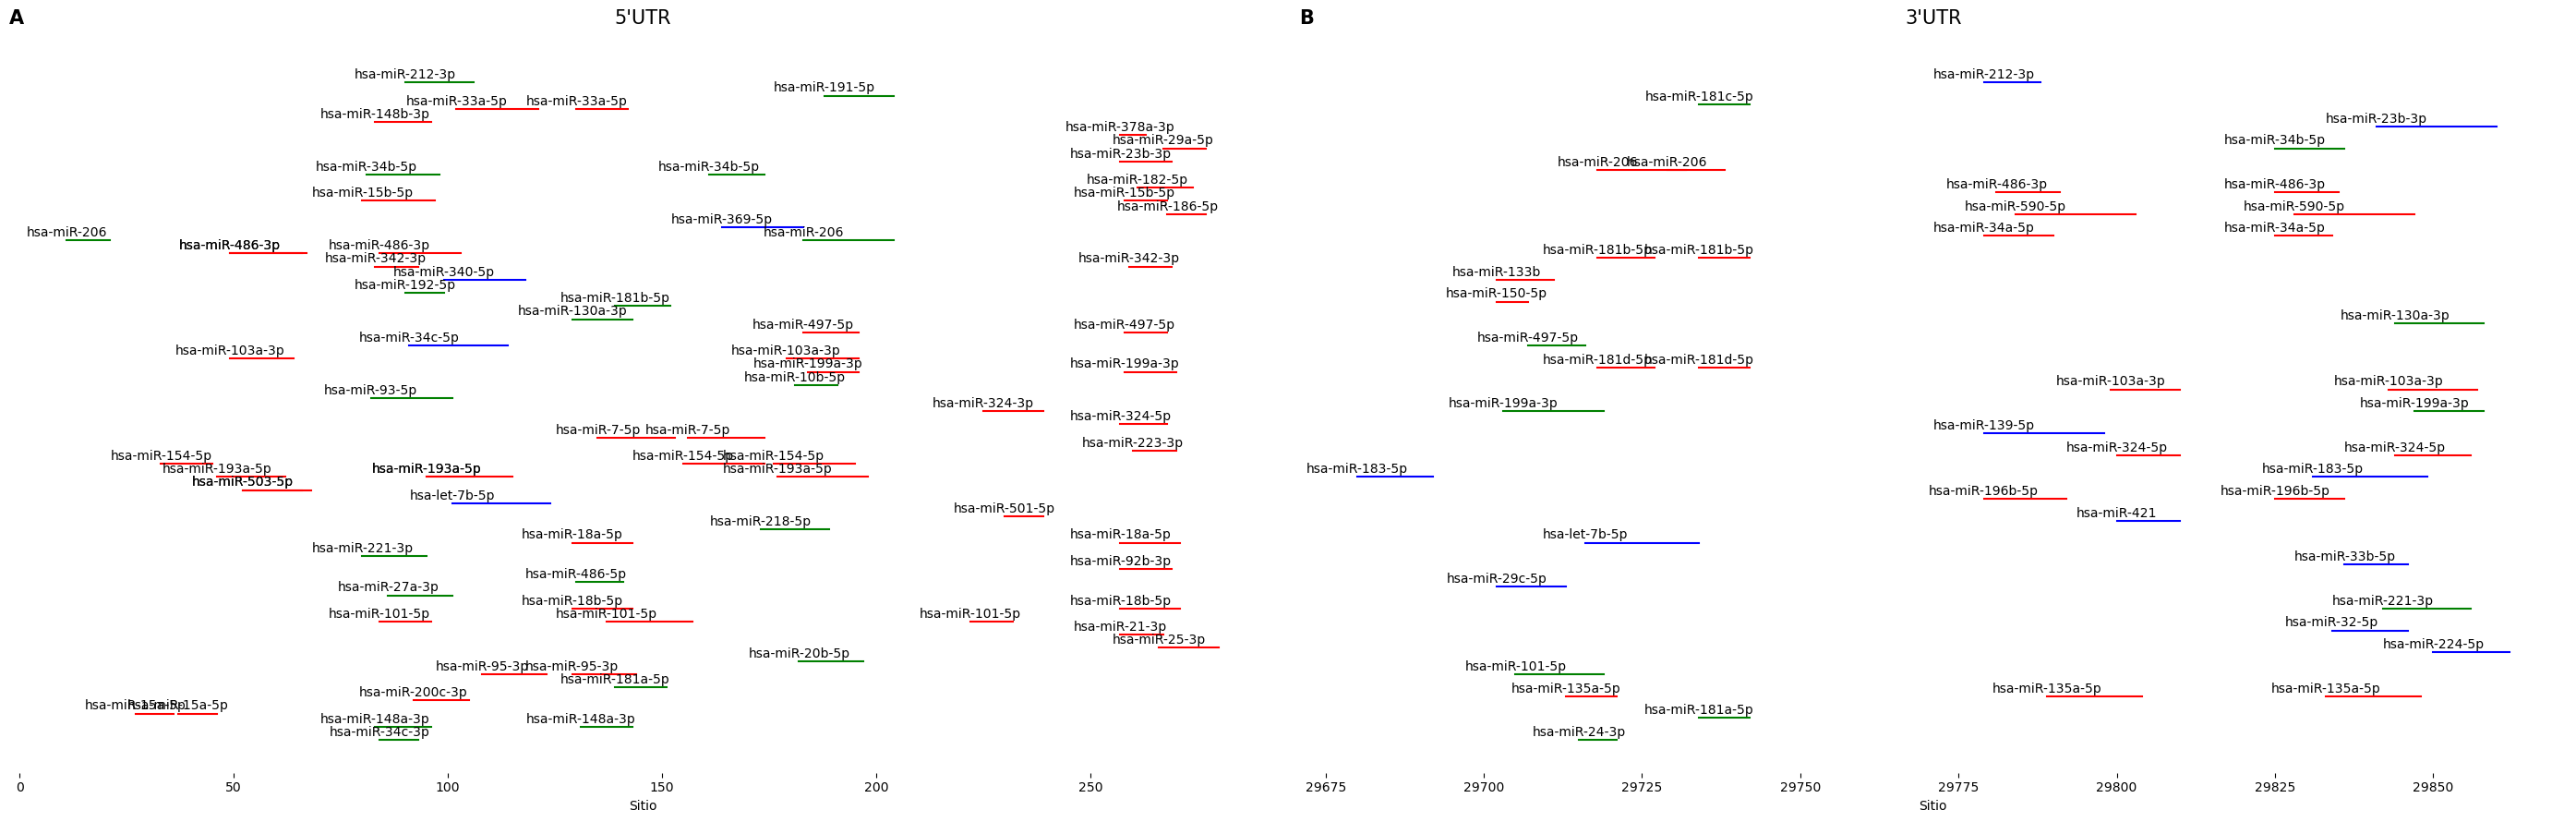

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(28, 9))

# Primer gráfico
for i in df_result1.miRNA.unique():
    df_i = df_result1[df_result1['miRNA'] == i]
    for j in df_i.rep.unique():
        df_ij = df_i[df_i['rep'] == j]
        sns.lineplot(data=df_ij, x='value', y='mapped_value', hue='group', 
                     palette={'ugG': 'red', 'ug1': 'blue', 'ug2': 'green', 'ug3': 'purple', 'ug4': 'orange'}, 
                     legend=False, ax=ax1)

# Agrupar por miRNA y anotar solo el primer punto de cada grupo
grouped = df_result1.groupby(by=['miRNA', 'rep']).first().reset_index()
for i in range(len(grouped)):
    ax1.annotate(grouped['miRNA'][i], (grouped['value'][i], grouped['mapped_value'][i]), textcoords="offset points", 
                 xytext=(0, 3), ha='center', fontsize=10)


sns.despine(left=True, bottom=True, ax=ax1)


# Segundo gráfico
for i in df_result2.miRNA.unique():
    df_i = df_result2[df_result2['miRNA'] == i]
    for j in df_i.rep.unique():
        df_ij = df_i[df_i['rep'] == j]
        sns.lineplot(data=df_ij, x='value', y='mapped_value', hue='group', 
                     palette={'ugG': 'red', 'ug1': 'blue', 'ug2': 'green', 'ug3': 'purple', 'ug4': 'orange'}, 
                     legend=False, ax=ax2)

# Agrupar por miRNA y anotar solo el primer punto de cada grupo
grouped = df_result2.groupby(by=['miRNA', 'rep']).first().reset_index()
for i in range(len(grouped)):
    ax2.annotate(grouped['miRNA'][i], (grouped['value'][i], grouped['mapped_value'][i]), textcoords="offset points", 
                 xytext=(0, 3), ha='center', fontsize=10)

sns.despine(left=True, bottom=True, ax=ax2)
ax1.set_title('A', fontweight="bold", loc = 'left', fontsize=15)
ax1.set_title("5'UTR", fontsize=15, pad=20)


ax2.set_title('B', fontweight="bold", loc = 'left', fontsize=15)
ax2.set_title("3'UTR", fontsize=15, pad=20)

ax1.set_xlabel('Sitio')
ax2.set_xlabel('Sitio')

ax1.set_ylabel('')
ax2.set_ylabel('')

ax1.set_yticks([])
ax2.set_yticks([])

plt.tight_layout()
plt.savefig('../../Plots/miRNA_predicted_geoConstantCluster.pdf')
plt.show()

# ajuste custom

In [27]:
df_result1.loc[df_result1['group'] != 'ugG', 'mapped_value'] = df_result1.loc[df_result1['group'] != 'ugG', 'mapped_value'].apply(lambda x: x + 56)
df_result2.loc[df_result2['group'] != 'ugG', 'mapped_value'] = df_result2.loc[df_result2['group'] != 'ugG', 'mapped_value'].apply(lambda x: x + 35)

In [28]:
df_result1.loc[df_result1['miRNA'] == 'hsa-miR-212-3p', 'mapped_value'] = df_result1.loc[df_result1['miRNA'] == 'hsa-miR-212-3p', 'mapped_value'].apply(lambda x: x - 12)
df_result1.loc[df_result1['miRNA'] == 'hsa-miR-103a-3p', 'mapped_value'] = df_result1.loc[df_result1['miRNA'] == 'hsa-miR-103a-3p', 'mapped_value'].apply(lambda x: x - 17)
df_result1.loc[df_result1['miRNA'] == 'hsa-miR-324-5p', 'mapped_value'] = df_result1.loc[df_result1['miRNA'] == 'hsa-miR-324-5p', 'mapped_value'].apply(lambda x: x + 4)
df_result1.loc[df_result1['miRNA'] == 'hsa-miR-486-3p', 'mapped_value'] = df_result1.loc[df_result1['miRNA'] == 'hsa-miR-486-3p', 'mapped_value'].apply(lambda x: x - 4)
df_result1.loc[df_result1['miRNA'] == 'hsa-miR-21-3p', 'mapped_value'] = df_result1.loc[df_result1['miRNA'] == 'hsa-miR-21-3p', 'mapped_value'].apply(lambda x: x + 12)
df_result1.loc[df_result1['miRNA'] == 'hsa-miR-497-5p', 'mapped_value'] = df_result1.loc[df_result1['miRNA'] == 'hsa-miR-497-5p', 'mapped_value'].apply(lambda x: x + 2)
df_result1.loc[df_result1['miRNA'] == 'hsa-miR-23b-3p', 'mapped_value'] = df_result1.loc[df_result1['miRNA'] == 'hsa-miR-23b-3p', 'mapped_value'].apply(lambda x: x + 8)
df_result1.loc[df_result1['miRNA'] == 'hsa-miR-92b-3p', 'mapped_value'] = df_result1.loc[df_result1['miRNA'] == 'hsa-miR-92b-3p', 'mapped_value'].apply(lambda x: x - 7)
df_result1.loc[df_result1['miRNA'] == 'hsa-miR-101-5p', 'mapped_value'] = df_result1.loc[df_result1['miRNA'] == 'hsa-miR-101-5p', 'mapped_value'].apply(lambda x: x + 2)
df_result1.loc[df_result1['miRNA'] == 'hsa-miR-223-3p', 'mapped_value'] = df_result1.loc[df_result1['miRNA'] == 'hsa-miR-223-3p', 'mapped_value'].apply(lambda x: x - 2)
df_result1.loc[df_result1['miRNA'] == 'hsa-miR-182-5p', 'mapped_value'] = df_result1.loc[df_result1['miRNA'] == 'hsa-miR-182-5p', 'mapped_value'].apply(lambda x: x + 1)
df_result1.loc[df_result1['miRNA'] == 'hsa-miR-199a-3p', 'mapped_value'] = df_result1.loc[df_result1['miRNA'] == 'hsa-miR-199a-3p', 'mapped_value'].apply(lambda x: x - 1)
df_result2.loc[df_result2['miRNA'] == 'hsa-miR-590-5p', 'mapped_value'] = df_result2.loc[df_result2['miRNA'] == 'hsa-miR-590-5p', 'mapped_value'].apply(lambda x: x - 2)
df_result2.loc[df_result2['miRNA'] == 'hsa-miR-486-3p', 'mapped_value'] = df_result2.loc[df_result2['miRNA'] == 'hsa-miR-486-3p', 'mapped_value'].apply(lambda x: x + 1)
df_result2.loc[df_result2['miRNA'] == 'hsa-miR-32-5p', 'mapped_value'] = df_result2.loc[df_result2['miRNA'] == 'hsa-miR-32-5p', 'mapped_value'].apply(lambda x: x + 3)
df_result2.loc[df_result2['miRNA'] == 'hsa-miR-130a-3p', 'mapped_value'] = df_result2.loc[df_result2['miRNA'] == 'hsa-miR-130a-3p', 'mapped_value'].apply(lambda x: x + 7)
df_result1.loc[df_result1['miRNA'] == 'hsa-miR-130a-3p', 'mapped_value'] = df_result1.loc[df_result1['miRNA'] == 'hsa-miR-130a-3p', 'mapped_value'].apply(lambda x: x + 7)
df_result2.loc[df_result2['miRNA'] == 'hsa-miR-497-5p', 'mapped_value'] = df_result2.loc[df_result2['miRNA'] == 'hsa-miR-497-5p', 'mapped_value'].apply(lambda x: x - 1)
df_result1.loc[df_result1['miRNA'] == 'hsa-miR-148a-3p', 'mapped_value'] = df_result1.loc[df_result1['miRNA'] == 'hsa-miR-148a-3p', 'mapped_value'].apply(lambda x: x + 3)
df_result1.loc[df_result1['miRNA'] == 'hsa-miR-34b-5p', 'mapped_value'] = df_result1.loc[df_result1['miRNA'] == 'hsa-miR-34b-5p', 'mapped_value'].apply(lambda x: x - 1)
df_result1.loc[df_result1['miRNA'] == 'hsa-miR-206', 'mapped_value'] = df_result1.loc[df_result1['miRNA'] == 'hsa-miR-206', 'mapped_value'].apply(lambda x: x - 3)
df_result1.loc[df_result1['miRNA'] == 'hsa-miR-221-3p', 'mapped_value'] = df_result1.loc[df_result1['miRNA'] == 'hsa-miR-221-3p', 'mapped_value'].apply(lambda x: x + 5)
df_result1.loc[df_result1['miRNA'] == 'hsa-miR-34c-3p', 'mapped_value'] = df_result1.loc[df_result1['miRNA'] == 'hsa-miR-34c-3p', 'mapped_value'].apply(lambda x: x + 5)
df_result1.loc[df_result1['miRNA'] == 'hsa-miR-503-5p', 'mapped_value'] = df_result1.loc[df_result1['miRNA'] == 'hsa-miR-503-5p', 'mapped_value'].apply(lambda x: x + 4)
df_result2.loc[df_result2['miRNA'] == 'hsa-miR-139-5p', 'mapped_value'] = df_result2.loc[df_result2['miRNA'] == 'hsa-miR-139-5p', 'mapped_value'].apply(lambda x: x - 3)
df_result1.loc[df_result1['miRNA'] == 'hsa-miR-199a-3p', 'mapped_value'] = df_result1.loc[df_result1['miRNA'] == 'hsa-miR-199a-3p', 'mapped_value'].apply(lambda x: x + 10)
df_result1.loc[df_result1['miRNA'] == 'hsa-miR-92b-3p', 'mapped_value'] = df_result1.loc[df_result1['miRNA'] == 'hsa-miR-92b-3p', 'mapped_value'].apply(lambda x: x + 12)
df_result1.loc[df_result1['miRNA'] == 'hsa-miR-23b-3p', 'mapped_value'] = df_result1.loc[df_result1['miRNA'] == 'hsa-miR-23b-3p', 'mapped_value'].apply(lambda x: x - 1)
df_result1.loc[df_result1['miRNA'] == 'hsa-miR-95-3p', 'mapped_value'] = df_result1.loc[df_result1['miRNA'] == 'hsa-miR-95-3p', 'mapped_value'].apply(lambda x: x - 2)
df_result1.loc[df_result1['miRNA'] == 'hsa-miR-486-3p', 'mapped_value'] = df_result1.loc[df_result1['miRNA'] == 'hsa-miR-486-3p', 'mapped_value'].apply(lambda x: x + 3)
df_result1.loc[df_result1['miRNA'] == 'hsa-miR-200c-3p', 'mapped_value'] = df_result1.loc[df_result1['miRNA'] == 'hsa-miR-200c-3p', 'mapped_value'].apply(lambda x: x - 2)
df_result1.loc[126:127, 'mapped_value'] -= 4
df_result1.loc[df_result1['miRNA'] == 'hsa-miR-15a-5p', 'mapped_value'] = df_result1.loc[df_result1['miRNA'] == 'hsa-miR-15a-5p', 'mapped_value'].apply(lambda x: x + 2)
df_result1.loc[82:83, 'mapped_value'] += 7
df_result1.loc[40:41, 'mapped_value'] -= 7

df_result2.loc[80:81, 'mapped_value'] += 2
df_result2.loc[df_result2['miRNA'] == 'hsa-miR-183-5p', 'mapped_value'] = df_result2.loc[df_result2['miRNA'] == 'hsa-miR-183-5p', 'mapped_value'].apply(lambda x: x - 5)
df_result2.loc[df_result2['miRNA'] == 'hsa-miR-199a-3p', 'mapped_value'] = df_result2.loc[df_result2['miRNA'] == 'hsa-miR-199a-3p', 'mapped_value'].apply(lambda x: x + 2)
df_result2.loc[df_result2['miRNA'] == 'hsa-miR-221-3p', 'mapped_value'] = df_result2.loc[df_result2['miRNA'] == 'hsa-miR-221-3p', 'mapped_value'].apply(lambda x: x - 8)
df_result2.loc[df_result2['miRNA'] == 'hsa-miR-224-5p', 'mapped_value'] = df_result2.loc[df_result2['miRNA'] == 'hsa-miR-224-5p', 'mapped_value'].apply(lambda x: x + 2)
df_result2.loc[df_result2['miRNA'] == 'hsa-miR-103a-3p', 'mapped_value'] = df_result2.loc[df_result2['miRNA'] == 'hsa-miR-103a-3p', 'mapped_value'].apply(lambda x: x + 2)
df_result2.loc[df_result2['miRNA'] == 'hsa-miR-181b-5p', 'mapped_value'] = df_result2.loc[df_result2['miRNA'] == 'hsa-miR-181b-5p', 'mapped_value'].apply(lambda x: x - 3)
df_result2.loc[df_result2['miRNA'] == 'hsa-miR-34a-5p', 'mapped_value'] = df_result2.loc[df_result2['miRNA'] == 'hsa-miR-34a-5p', 'mapped_value'].apply(lambda x: x + 3)
df_result2.loc[df_result2['miRNA'] == 'hsa-miR-133b', 'mapped_value'] = df_result2.loc[df_result2['miRNA'] == 'hsa-miR-133b', 'mapped_value'].apply(lambda x: x - 2)
df_result2.loc[78:79, 'mapped_value'] += 3
df_result2.loc[84:85, 'mapped_value'] -= 3




df_result1.drop([14,15,28,29, 102, 103], inplace = True)

In [29]:
df_result2.loc[df_result2['miRNA'] == 'hsa-miR-181b-5p']



,miRNA,region_pair,group,rep,position,value,mapped_value
56,hsa-miR-181b-5p,"29718,29727",ugG,1,start,29718.0,20.0
57,hsa-miR-181b-5p,"29718,29727",ugG,1,end,29727.0,20.0
78,hsa-miR-181b-5p,"29734,29742",ugG,2,start,29734.0,23.0
79,hsa-miR-181b-5p,"29734,29742",ugG,2,end,29742.0,23.0


In [30]:

df_result2.loc[df_result2['miRNA'] == 'hsa-miR-181d-5p']

,miRNA,region_pair,group,rep,position,value,mapped_value
60,hsa-miR-181d-5p,"29718,29727",ugG,1,start,29718.0,18.0
61,hsa-miR-181d-5p,"29718,29727",ugG,1,end,29727.0,18.0
84,hsa-miR-181d-5p,"29734,29742",ugG,2,start,29734.0,15.0
85,hsa-miR-181d-5p,"29734,29742",ugG,2,end,29742.0,15.0


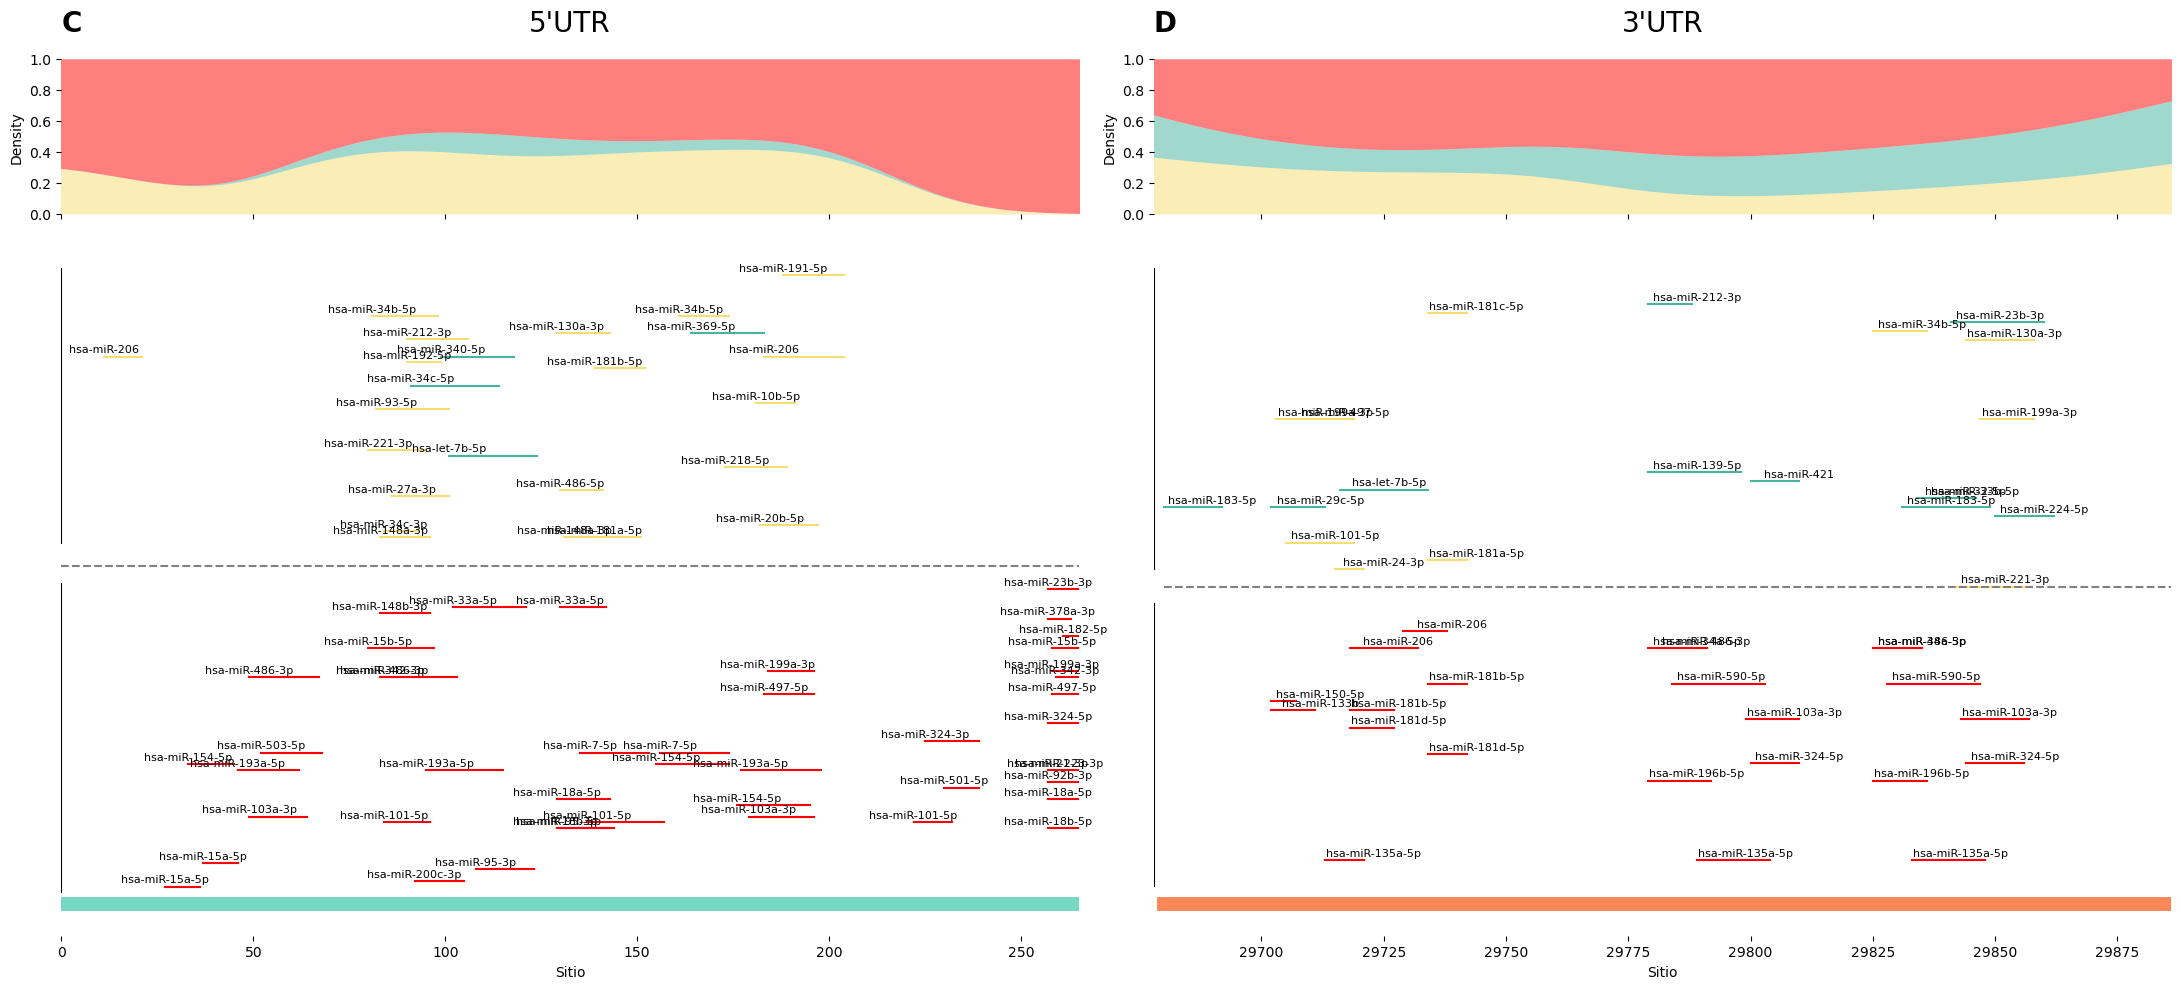

In [32]:
p = {'ugG': 'red', 'ug1': '#45B39D', 'ug2': '#F7DC6F', 'ug3': '#61A1EC', 'ug4': '#EC8361'}

fig, axs = plt.subplots(2, 2, sharex='col', figsize=(22, 10) , gridspec_kw={'height_ratios': [2, 9]})

#===================================== five plot on the top =============================


sns.kdeplot(data=df_result1, x="value", hue='group', ax=axs[0, 0], palette=p, legend=False, 
            alpha=0.5, multiple="fill", linewidth=0)

axs[0,0].set_xlim([0, 265]) 


sns.kdeplot(data=df_result2, x="value", hue='group', ax=axs[0, 1], palette=p, legend=False, 
            alpha=0.5, multiple="fill", linewidth=0)

axs[0,1].set_xlim([29678, 29886]) 



# Primer gráfico
for i in df_result1.miRNA.unique():
    df_i = df_result1[df_result1['miRNA'] == i]
    for j in df_i.rep.unique():
        df_ij = df_i[df_i['rep'] == j]
        sns.lineplot(data=df_ij, x='value', y='mapped_value', hue='group', 
                     palette=p, 
                     legend=False, ax=axs[1,0])

# Agrupar por miRNA y anotar solo el primer punto de cada grupo
grouped = df_result1.groupby(by=['miRNA', 'rep']).first().reset_index()
for i in range(len(grouped)):
    axs[1,0].annotate(grouped['miRNA'][i], (grouped['value'][i], grouped['mapped_value'][i]), textcoords="offset points", 
                 xytext=(0, 3), ha='center', fontsize=8)


df_line = pd.DataFrame({
    'value':[1, 280],
    'mapped_value': [-2,-2],
    'group': ['5', '5']
})
sns.lineplot(data=df_line, x='value', y='mapped_value', hue='group', 
                     palette={'5': '#76d7c4'}, linewidth = 10, 
                     legend=False, ax=axs[1,0])

# Añadir una línea vertical 
axs[1,0].plot([0, 0], [0, 53], color='black', linestyle='-')
axs[1,0].plot([0, 0], [60, 107], color='black', linestyle='-')

axs[1,0].plot([0, 265], [56, 56], color='gray', linestyle='--')



sns.despine(left=True, bottom=True, ax=axs[0,1])


# Segundo gráfico
for i in df_result2.miRNA.unique():
    df_i = df_result2[df_result2['miRNA'] == i]
    for j in df_i.rep.unique():
        df_ij = df_i[df_i['rep'] == j]
        sns.lineplot(data=df_ij, x='value', y='mapped_value', hue='group', 
                     palette=p, 
                     legend=False, ax=axs[1,1])

# Agrupar por miRNA y anotar solo el primer punto de cada grupo
grouped = df_result2.groupby(by=['miRNA', 'rep']).first().reset_index()
for i in range(len(grouped)):
    axs[1,1].annotate(grouped['miRNA'][i], (grouped['value'][i]+10, grouped['mapped_value'][i]), textcoords="offset points", 
                 xytext=(0, 3), ha='center', fontsize=8)

df_line = pd.DataFrame({
    'value':[29680, 29886],
    'mapped_value': [-2, -2],
    'group': ['3', '3']
})
sns.lineplot(data=df_line, x='value', y='mapped_value', hue='group', 
                     palette={'3': '#ff8658'}, linewidth = 10, 
                     legend=False, ax=axs[1,1])



sns.despine(left=True, bottom=True, ax=axs[1,1])
sns.despine(left=True, bottom=True, ax=axs[0,0])
sns.despine(left=True, bottom=True, ax=axs[0,1])
sns.despine(left=True, bottom=True, ax=axs[1,0])


# Añadir una línea vertical 
axs[1,1].plot([29678, 29678], [0, 32], color='black', linestyle='-')
axs[1,1].plot([29678, 29678], [36, 70], color='black', linestyle='-')

axs[1,1].plot([29680, 29886], [34, 34], color='gray', linestyle='--')


axs[0,0].set_title('C', fontweight="bold", loc = 'left', fontsize=20)
axs[0,0].set_title("5'UTR", fontsize=20, pad=20)


axs[0,1].set_title('D', fontweight="bold", loc = 'left', fontsize=20)
axs[0,1].set_title("3'UTR", fontsize=20, pad=20)

axs[1,0].set_xlabel('Sitio')
axs[1,1].set_xlabel('Sitio')

axs[1,1].set_ylabel('')
axs[1,0].set_ylabel('')

axs[1,1].set_yticks([])
axs[1,0].set_yticks([])

plt.tight_layout()
plt.savefig('../../Plots/miRNA_predicted_geoConstantCluster.pdf')

In [317]:
df_result1.to_csv('../../Data/miRNA_predicted_ToPlot_Constant_5UTR.tsv', index = False, sep = '\t')
df_result2.to_csv('../../Data/miRNA_predicted_ToPlot_Clusters_3UTR.tsv', index = False, sep = '\t')